# Введение в искусственные нейронные сети
# Урок 2. Keras

## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

## Решение

In [14]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import fashion_mnist  # набор для работы

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [15]:
(train_imagesi,train_labels),(test_imagesi,test_labels)=fashion_mnist.load_data()

# Normalize the images.
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [16]:
# Для красоты решил добавить расшифровку названий (классов)
labels_name = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

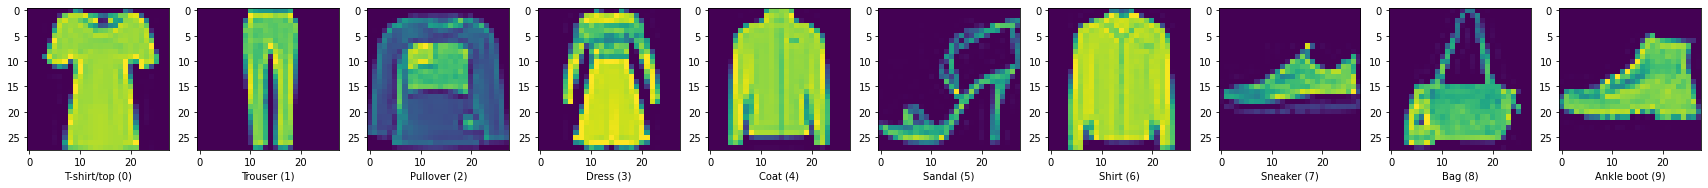

In [17]:
classes = np.unique(train_labels) # Определение всех возможных классов
plt.figure(figsize =(3*len(classes),5))

cnt = 1
for el in classes:
    # выбор случайного индекса для одной картинке внутри класса
    idx = np.where(train_labels == el)
    i = idx[0][np.random.randint(len(idx[0]))]
    
    # отрисовка выбранной картинки
    plt.subplot(1, len(classes), cnt)
    plt.imshow(train_imagesi[i, :].reshape(28,28))
    plt.xlabel(f'{labels_name[el]} ({str(el)})')
    
    cnt += 1


### 2-слойная модель

Ниже будет приведен результат экспериментов с разным количеством слоев и разным количеством эпох для двухнейронной сети. Самым первым будет расчет для 500 эпох. Решил его не удалять, т.к. в результате долгой работы получается очень красивая картинка. Но все сети оказываются переученными.

Обработка случая в котором количество нейронов: 3
Обработка случая в котором количество нейронов: 5
Обработка случая в котором количество нейронов: 7
Обработка случая в котором количество нейронов: 10
Обработка случая в котором количество нейронов: 13
Обработка случая в котором количество нейронов: 20
Обработка случая в котором количество нейронов: 35
Обработка случая в котором количество нейронов: 50
Обработка случая в котором количество нейронов: 75
Обработка случая в котором количество нейронов: 100
Обработка случая в котором количество нейронов: 200
Обработка случая в котором количество нейронов: 400


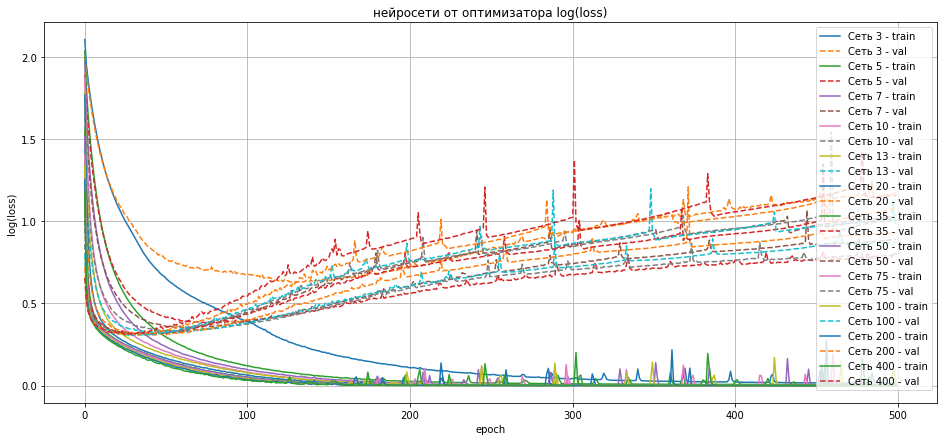

In [ ]:
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 500
# вектор для выводв результатов
epoch = np.arange(epochs)

result2 = []

for neuron_num in [3, 5, 7, 10, 13, 20, 35, 50, 75, 100, 200, 400]:
    
    print(f'Обработка случая в котором количество нейронов: {neuron_num}')

    # Build the model.
    model2 = Sequential([
        Dense(128, activation='sigmoid', input_shape=(784,)),
        Dense(neuron_num, activation='sigmoid'),
        Dense(10, activation='softmax'),
    ])

    # Compile the model.
    model2.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )

    # Train the model.
    history2 = model2.fit(
        train_images,
        to_categorical(train_labels,10),
        epochs=epochs,
        batch_size=600, 
        validation_split=0.2,
        verbose=0
    )

    # накопление результатов
    model_name = f'Количество нейронов в каждом слое: {neuron_num}'
    model_accuracy = history2.history['accuracy'][epochs-1]
    model_val_accuracy = history2.history['val_accuracy'][epochs-1]
    result2.append([model_name,model_accuracy, model_val_accuracy])

    # картинки
    plt.plot(epoch,history2.history['loss'],'-',label = f'Сеть {neuron_num} - train')
    plt.plot(epoch,history2.history['val_loss'],'--',label = f'Сеть {neuron_num} - val')

plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [ ]:
# Оценка accuracy
pd.DataFrame(result2, columns=['model_name','model_accuracy','model_val_accuracy']).sort_values('model_val_accuracy',ascending=False)

,model_name,model_accuracy,model_val_accuracy
10,Количество нейронов в каждом слое: 200,1.000000,0.887000
11,Количество нейронов в каждом слое: 400,1.000000,0.886000
8,Количество нейронов в каждом слое: 75,1.000000,0.885750
5,Количество нейронов в каждом слое: 20,1.000000,0.882000
6,Количество нейронов в каждом слое: 35,1.000000,0.881250
7,Количество нейронов в каждом слое: 50,1.000000,0.881250
4,Количество нейронов в каждом слое: 13,1.000000,0.881000
3,Количество нейронов в каждом слое: 10,0.999750,0.880083
9,Количество нейронов в каждом слое: 100,0.998042,0.879417
1,Количество нейронов в каждом слое: 5,0.997396,0.875667


Обработка случая в котором количество нейронов: 3
Обработка случая в котором количество нейронов: 5
Обработка случая в котором количество нейронов: 7
Обработка случая в котором количество нейронов: 10
Обработка случая в котором количество нейронов: 13
Обработка случая в котором количество нейронов: 20
Обработка случая в котором количество нейронов: 35
Обработка случая в котором количество нейронов: 50
Обработка случая в котором количество нейронов: 75
Обработка случая в котором количество нейронов: 100
Обработка случая в котором количество нейронов: 200
Обработка случая в котором количество нейронов: 400


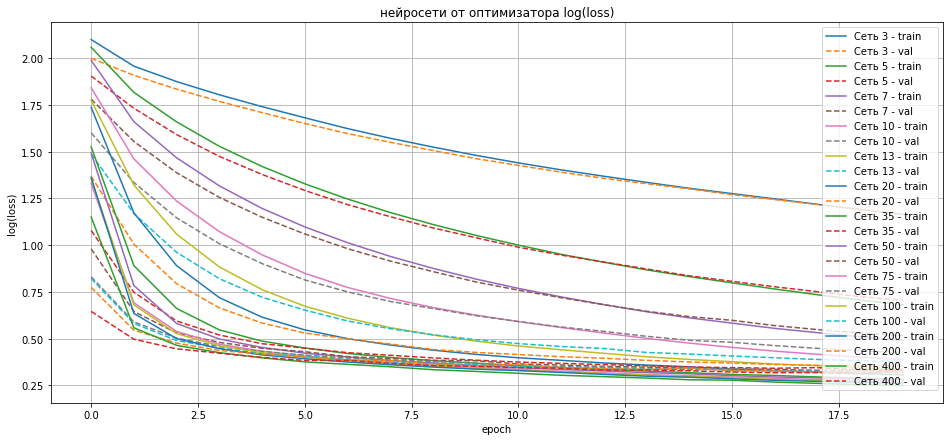

In [ ]:
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 20
# вектор для выводв результатов
epoch = np.arange(epochs)

result2 = []

for neuron_num in [3, 5, 7, 10, 13, 20, 35, 50, 75, 100, 200, 400]:
    
    print(f'Обработка случая в котором количество нейронов: {neuron_num}')

    # Build the model.
    model2 = Sequential([
        Dense(128, activation='sigmoid', input_shape=(784,)),
        Dense(neuron_num, activation='sigmoid'),
        Dense(10, activation='softmax'),
    ])

    # Compile the model.
    model2.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )

    # Train the model.
    history2 = model2.fit(
        train_images,
        to_categorical(train_labels,10),
        epochs=epochs,
        batch_size=600, 
        validation_split=0.2,
        verbose=0
    )

    # накопление результатов
    model_name = f'Количество нейронов в каждом слое: {neuron_num}'
    model_accuracy = history2.history['accuracy'][epochs-1]
    model_val_accuracy = history2.history['val_accuracy'][epochs-1]
    result2.append([model_name,model_accuracy, model_val_accuracy])

    # картинки
    plt.plot(epoch,history2.history['loss'],'-',label = f'Сеть {neuron_num} - train')
    plt.plot(epoch,history2.history['val_loss'],'--',label = f'Сеть {neuron_num} - val')

plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [ ]:
# Оценка accuracy
pd.DataFrame(result2, columns=['model_name','model_accuracy','model_val_accuracy']).sort_values('model_val_accuracy',ascending=False)

,model_name,model_accuracy,model_val_accuracy
8,Количество нейронов в каждом слое: 75,0.904625,0.885833
10,Количество нейронов в каждом слое: 200,0.907000,0.885750
9,Количество нейронов в каждом слое: 100,0.905563,0.884583
7,Количество нейронов в каждом слое: 50,0.903229,0.881333
6,Количество нейронов в каждом слое: 35,0.901729,0.880667
5,Количество нейронов в каждом слое: 20,0.898250,0.877667
4,Количество нейронов в каждом слое: 13,0.894313,0.876167
11,Количество нейронов в каждом слое: 400,0.909750,0.875667
3,Количество нейронов в каждом слое: 10,0.886833,0.868000
2,Количество нейронов в каждом слое: 7,0.877104,0.863167


А вообще, в двухслойной моделе оптимальный результат 0.893 достигается при 30-50 эпохах на валидационной выборке. У сетей со 100-200 нейронами. Но 20-30 нейронов тоже дают при таком количестве эпох неплохой результат для валидационной выборки. Примерно 0.892

Поэтому, для дальнейших экспериментов выберем средние значения. Количество эпох - 40, а нейронов в промежуточных слоях - 150.

In [29]:
result_dense = []
statistics = []
epochs = 40
numbers_of_layers = [2, 3, 5, 10]

for nol in numbers_of_layers:

    print(f'Расчет сети для {nol} внутренних слоев')

    layers_list = [Dense(128, activation='sigmoid', input_shape=(784,))]
    for i in range(nol-1):
        layers_list += [Dense(150, activation='sigmoid')]
    layers_list +=  [Dense(10, activation='softmax')]

    # Build the model.
    model = Sequential(layers_list)

    # Compile the model.
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    # Train the model.
    history = model.fit(
      train_images,
      to_categorical(train_labels,10),
      epochs=epochs,
      batch_size=600, 
      validation_split=0.2,
      verbose = 0
    )

    statistics.append({'loss': history.history['loss'].copy(), 
                       'val_loss': history.history['val_loss'].copy(), 
                       'accuracy': history.history['accuracy'].copy(), 
                       'val_accuracy': history.history['val_accuracy'].copy()})

    # Evaluate the model.
    test_scores = model.evaluate(
      test_images,
      to_categorical(test_labels)
    )

    # накопление результатов
    mod_name = f'{str(nol)}-слойная сеть'
    mod_accuracy = history.history['accuracy'][epochs-1]
    mod_val_accuracy = history.history['val_accuracy'][epochs-1]
    test_accuracy = test_scores[1]
    result_dense.append([mod_name, mod_accuracy, mod_val_accuracy, test_accuracy])

Расчет сети для 2 внутренних слоев
313/313 [==============================] - 1s 2ms/step - loss: 0.3436 - accuracy: 0.8817
Расчет сети для 3 внутренних слоев
313/313 [==============================] - 1s 2ms/step - loss: 0.3775 - accuracy: 0.8776
Расчет сети для 5 внутренних слоев
313/313 [==============================] - 1s 2ms/step - loss: 0.4289 - accuracy: 0.8684
Расчет сети для 10 внутренних слоев
313/313 [==============================] - 1s 3ms/step - loss: 1.2447 - accuracy: 0.3822


Text(0.5, 1.0, 'Потери на эпохах')

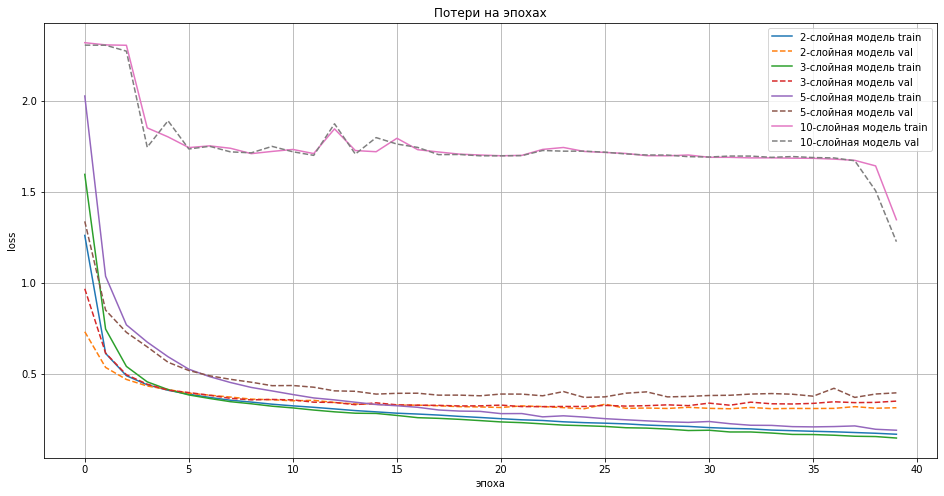

In [33]:
plt.figure(figsize=(16, 8))

plt.plot(statistics[0]['loss'],'-', label='2-слойная модель train')
plt.plot(statistics[0]['val_loss'],'--', label='2-слойная модель val')
plt.plot(statistics[1]['loss'],'-', label='3-слойная модель train')
plt.plot(statistics[1]['val_loss'],'--', label='3-слойная модель val')
plt.plot(statistics[2]['loss'],'-', label='5-слойная модель train')
plt.plot(statistics[2]['val_loss'],'--', label='5-слойная модель val')
plt.plot(statistics[3]['loss'],'-', label='10-слойная модель train')
plt.plot(statistics[3]['val_loss'],'--', label='10-слойная модель val')
plt.xlabel('эпоха')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('Потери на эпохах')

Text(0.5, 1.0, 'Accuracy на эпохах')

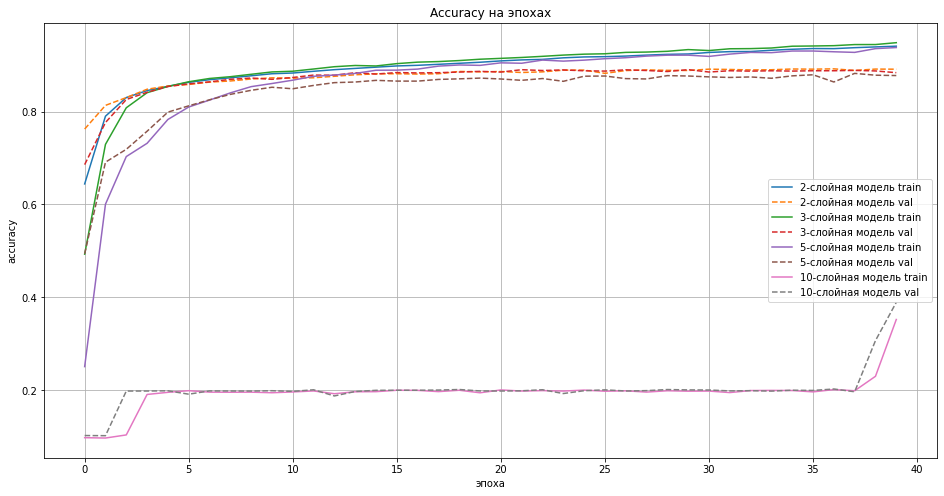

In [34]:
plt.figure(figsize=(16, 8))

plt.plot(statistics[0]['accuracy'],'-', label='2-слойная модель train')
plt.plot(statistics[0]['val_accuracy'],'--', label='2-слойная модель val')
plt.plot(statistics[1]['accuracy'],'-', label='3-слойная модель train')
plt.plot(statistics[1]['val_accuracy'],'--', label='3-слойная модель val')
plt.plot(statistics[2]['accuracy'],'-', label='5-слойная модель train')
plt.plot(statistics[2]['val_accuracy'],'--', label='5-слойная модель val')
plt.plot(statistics[3]['accuracy'],'-', label='10-слойная модель train')
plt.plot(statistics[3]['val_accuracy'],'--', label='10-слойная модель val')
plt.xlabel('эпоха')
plt.ylabel('accuracy')
plt.legend()
plt.grid('On')
plt.title('Accuracy на эпохах')

In [35]:
# Оценка accuracy
pd.DataFrame(result_dense, columns=['mod_name','mod_accuracy','mod_val_accuracy', 'test_accuracy']).sort_values('mod_val_accuracy',ascending=False).head(5)

,mod_name,mod_accuracy,mod_val_accuracy,test_accuracy
0,2-слойная сеть,0.940521,0.891000,0.8817
1,3-слойная сеть,0.948021,0.883500,0.8776
2,5-слойная сеть,0.937563,0.877333,0.8684
3,10-слойная сеть,0.352604,0.389583,0.3822


10-ти слойная модель показала очень плохой результат. Видимо из-за переобучения. А то, что при выбранном количестве нейронов(150) уже двухслойная сеть дает хороший результат - результат хорошо проведенного анализа на предыдущем шаге. Где нужно было всесторонне проанализировать именно 2-х слойную сеть. Если провести такой же разносторонний анализ для 3-х, 5-ти и 10-ти слоев, то, скорее всего, найдутся параметры, при которых результат будет лучше, чем в 2-х слойной.

### Эксперимент с разными оптимизаторами для одной начальной модели:
  - создаем модель model
  - сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
  - создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры) 
  - загружаем веса modeli.load_weights('model.h5')
  - компилируем modeli с одним из оптимизаторов
  - вычисляем ошибку для modeli без обучения (т.к. все модели начинают с одной точки, то все ошибки должны быть одинаковые, но будем контролировать это и считаем каждый раз заново)
  - проводим обучение модели и пишем ошибки в истории hh
  - выводим ошибки для 0-го момента и каждой эпохи обучения по тестовой и валидационной частям данных

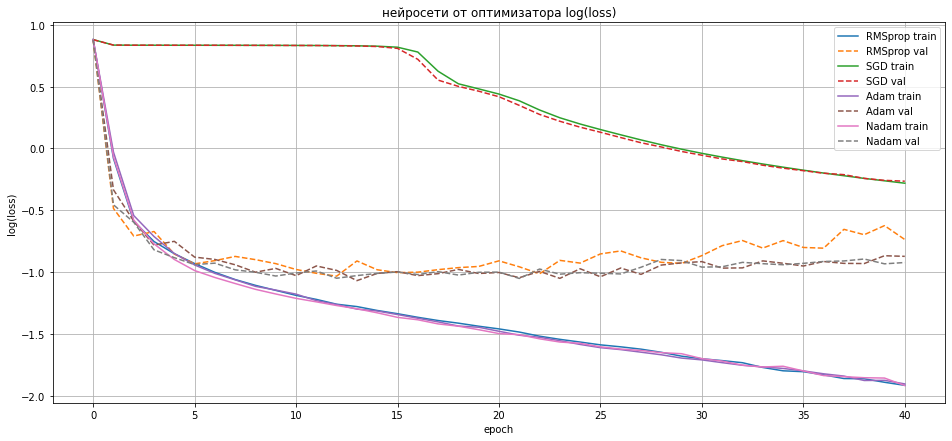

In [37]:
# фиксация шаблона для создания модели
layers_list = [Dense(128, activation='sigmoid', input_shape=(784,)),
               Dense(100, activation='sigmoid'), 
               Dense(150, activation='sigmoid'), 
               Dense(125, activation='sigmoid'), 
               Dense(50, activation='sigmoid'), 
               Dense(10, activation='softmax'),
              ]

# создание модели model
model = Sequential(layers_list)

# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 40
# вектор для выводв результатов
epoch = np.arange(epochs+1)

result=[]

# будем изменять оптимизаторы
for opt_i in [keras.optimizers.RMSprop(),keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]:
    
    print(f'Расчет сети с оптимизатором {opt_i}')

    # создаем рабочую модель model_i куда будем загружать эти вес (она должна быть идентичной структуры)
    model_i = Sequential(layers_list)
    
    # загружаем веса model_i.load_weights('model.h5')
    model_i.load_weights('model.h5')
    # компилируем model_i с одним из оптимизаторов
    model_i.compile(
        optimizer=opt_i,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
    # вычисляем ошибку для model_i без обучения
    hh0_tr = model_i.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
    hh0_val = model_i.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
    # проводим обучение модели 
    hh = model_i.fit(
    train_images,
    to_categorical(train_labels),
    epochs=epochs,
    batch_size=32, 
    validation_split=0.2, 
    verbose = 0
    )

    # накопление результатов
    method_name = model_i.optimizer.get_config()['name']
    method_accuracy = hh.history['accuracy'][14]
    method_val_accuracy = hh.history['val_accuracy'][14]
    result.append([method_name,method_accuracy, method_val_accuracy])


    # визуализация
    plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = model_i.optimizer.get_config()['name']+' train')
    plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = model_i.optimizer.get_config()['name']+' val')

plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()


In [38]:
# Оценка accuracy
import pandas as pd
pd.DataFrame(result, columns=['method_name','method_accuracy','method_val_accuracy']).sort_values('method_val_accuracy',ascending=False).head(4)

,method_name,method_accuracy,method_val_accuracy
0,RMSprop,0.906417,0.879167
2,Adam,0.906229,0.876583
3,Nadam,0.910604,0.876250
1,SGD,0.200146,0.241000


SGD	выглядит "хуже" остальных, но если ему добавтить эпох, то он должен дотянуть до хорошего качества.

**Вывод**

Для более или менее качественного результата необходимо анализировать 4 параметра:
* Количество слоев
* Количество нейронов в каждом слое
* Количество эпох
* Используемый оптимизатор

И конечно время, затрачиваемое на обучение модели. К сожалению в данный момент мне не хватает опыта, чтобы дать более универсальный совет. Нужно практиковать....

Посмотрим на результат предсказаний для обученной модели (лучшей по результатам эксперимента) с оптимизатором RMSprop

In [40]:
model_f = Sequential(layers_list)

# загружаем веса model_i.load_weights('model.h5')
model_f.load_weights('model.h5')
# компилируем model_i с одним из оптимизаторов
model_f.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )

hh = model_f.fit(
    train_images,
    to_categorical(train_labels),
    epochs=epochs,
    batch_size=32, 
    validation_split=0.2, 
    verbose = 0
    )

1/1 [==============================] - 0s 89ms/step


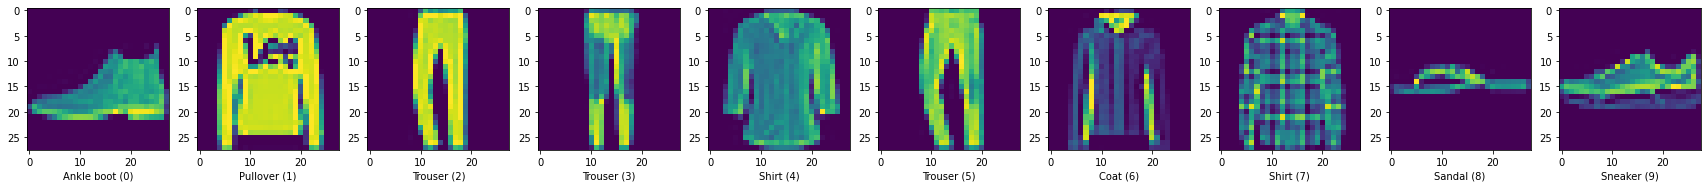

In [42]:
plt.figure(figsize =(3*len(classes),5))

y_pred = model_f.predict(test_images[:len(classes),:])
y_pred_class = np.argmax(y_pred,axis=1)

cnt = 1
for el in classes:
    # выбор случайного индекса для одной картинке внутри класса
    idx = np.where(train_labels == el)
    i = idx[0][np.random.randint(len(idx[0]))]
    
    # отрисовка выбранной картинки
    plt.subplot(1, len(classes), cnt)
    plt.imshow(test_images[el,:].reshape(28,28))
    plt.xlabel(f'{labels_name[y_pred_class[el]]} ({str(el)})')
    
    cnt += 1

In [43]:
y_pred_class

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [45]:
test_pred = np.argmax(model_i.predict(test_images), axis=1)

313/313 [==============================] - 1s 2ms/step


In [46]:
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.77      0.82      0.79      1000
           3       0.89      0.88      0.88      1000
           4       0.81      0.80      0.80      1000
           5       0.94      0.96      0.95      1000
           6       0.69      0.65      0.67      1000
           7       0.94      0.94      0.94      1000
           8       0.98      0.94      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [47]:
print(confusion_matrix(test_labels, test_pred))

[[831   2  25  18   2   2 115   0   5   0]
 [  5 969   2  18   3   0   2   1   0   0]
 [ 16   2 825   9  78   0  69   0   1   0]
 [ 40   8  15 877  30   1  26   0   3   0]
 [  1   0 101  35 797   0  63   0   3   0]
 [  0   1   0   0   0 957   0  27   1  14]
 [142   0 106  26  70   0 647   0   9   0]
 [  0   0   0   0   0  25   0 938   0  37]
 [ 11   1   3   6  10  10  21   3 935   0]
 [  0   0   0   0   0  21   1  29   0 949]]


Судя по матрице лучшие результаты получились в тех классах, где было больше примеров. Получается, что необходимо внимательней относится к распределению данных в выборке для обучения. И перемешивать более аккуратно. 